In [35]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('../data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.sample(5)

,id,keyword,location,text,target
3516,5027,eyewitness,"Terlingua, Texas",#ClimateChange Eyewitness to Extreme Weather: ...,1
7335,10500,wildfire,Worldwide,California wildfire destroys more homes but cr...,1
4563,6486,injuries,"Orlando,FL USA",Official kinesiology tape of IRONMANå¨ long-la...,0
4963,7074,meltdown,Storybrooke / The Moors,A back to school commercial came on and my sis...,0
5764,8226,riot,United Kingdom,'Without an ally near you can't use this skill...,0


## Describe

In [18]:
train.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


En *keyword* hay 7552 elementos no nulos, 221 palabras unicas donde *fatalities* es el mas repetido con 45 repeticiones.
Las otras colunmas son similares

## Missing data

In [29]:
def missing_values(data: pd.DataFrame) -> pd.DataFrame:
    miss_value_percent = data.isna().sum() / data.shape[0] * 100
    return pd.DataFrame(miss_value_percent, columns=['Missing_percent'])

In [30]:
missing_values(train)

,Missing_percent
id,0.000000
keyword,0.801261
location,33.272035
text,0.000000
target,0.000000


En *keyword* hay un 0.8% de valores nulos y en *location* hay un 33.27% valores nulos

## Distribution of the target variable

Text(0, 0.5, 'Samples')

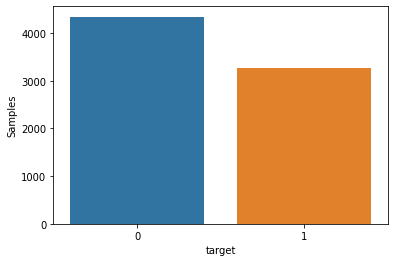

In [36]:
sns.countplot(train.target)
plt.ylabel('Samples')